Importing all the dependencies

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# train_test_split - function that splits data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load data

In [2]:
# load data
raw_X = pd.read_csv('../datasets/auto-mpg.csv')
raw_Y = raw_X.pop('mpg')

Applying scaling

In [3]:
scaler = StandardScaler()
scaler.fit(raw_X)

raw_X = scaler.transform(raw_X)

Split data

In [4]:
# split data for train and test+val (0.1 + 0.2)
train_X, test_and_val_X, train_Y, test_and_val_Y = train_test_split(raw_X, raw_Y, test_size=0.3)

# split data for test and val (0.2/0.3)
test_X, val_X, test_Y, val_Y = train_test_split(test_and_val_X, test_and_val_Y, test_size=0.66)

Setup model

In [5]:
# setup model
model = tf.keras.Sequential()

n_cols = train_X.shape[1]

Compile model with `adam` optimizer

In [6]:
# add layers
model.add(tf.keras.layers.Dense(72, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(144, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(72, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(1))

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

Print `adam`'s plot

In [7]:
history = model.fit(train_X, train_Y, validation_data=(val_X, val_Y.to_numpy()), epochs=1000, callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
])

Epoch 1/1000
1/9 [==>...........................] - ETA: 1s - loss: 670.5961

2022-10-27 08:36:52.811384: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 0s 7ms/step - loss: 617.5217 - val_loss: 550.2332
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 578.5382 - val_loss: 499.0322
Epoch 3/1000
9/9 [==============================] - 0s 1ms/step - loss: 506.2514 - val_loss: 401.7339
Epoch 4/1000
9/9 [==============================] - 0s 1ms/step - loss: 379.3008 - val_loss: 247.3549
Epoch 5/1000
9/9 [==============================] - 0s 1ms/step - loss: 202.5940 - val_loss: 91.9122
Epoch 6/1000
9/9 [==============================] - 0s 1ms/step - loss: 69.4330 - val_loss: 55.6108
Epoch 7/1000
9/9 [==============================] - 0s 1ms/step - loss: 46.0305 - val_loss: 42.4892
Epoch 8/1000
9/9 [==============================] - 0s 1ms/step - loss: 30.2734 - val_loss: 30.3082
Epoch 9/1000
9/9 [==============================] - 0s 1ms/step - loss: 27.0987 - val_loss: 24.2056
Epoch 10/1000
9/9 [==============================] - 0s 1ms/step - loss: 22.1445 - val_loss: 22.1897
Epo

9/9 [==============================] - 0s 1ms/step - loss: 6.2411 - val_loss: 8.0140
Epoch 84/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.2850 - val_loss: 7.6176
Epoch 85/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.4691 - val_loss: 8.0409
Epoch 86/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.2187 - val_loss: 7.3428
Epoch 87/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.0736 - val_loss: 7.7535
Epoch 88/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.0435 - val_loss: 7.4525
Epoch 89/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.1542 - val_loss: 7.4434
Epoch 90/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.0127 - val_loss: 7.4496
Epoch 91/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.3390 - val_loss: 7.8687
Epoch 92/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.6134 - val_loss: 7.4322
Epoch 93/1000
9/9 [=====

9/9 [==============================] - 0s 1ms/step - loss: 4.7916 - val_loss: 6.6018
Epoch 166/1000
9/9 [==============================] - 0s 1ms/step - loss: 4.9456 - val_loss: 6.8012
Epoch 167/1000
9/9 [==============================] - 0s 1ms/step - loss: 4.8598 - val_loss: 6.7635
Epoch 168/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.8704 - val_loss: 6.7444
Epoch 169/1000
9/9 [==============================] - 0s 2ms/step - loss: 5.1431 - val_loss: 7.5821
Epoch 170/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.8140 - val_loss: 6.6989
Epoch 171/1000
9/9 [==============================] - 0s 2ms/step - loss: 5.1204 - val_loss: 7.0893
Epoch 172/1000
9/9 [==============================] - 0s 1ms/step - loss: 4.8377 - val_loss: 6.6353
Epoch 173/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.6282 - val_loss: 6.5526
Epoch 174/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.6887 - val_loss: 6.5988
Epoch 175/1000


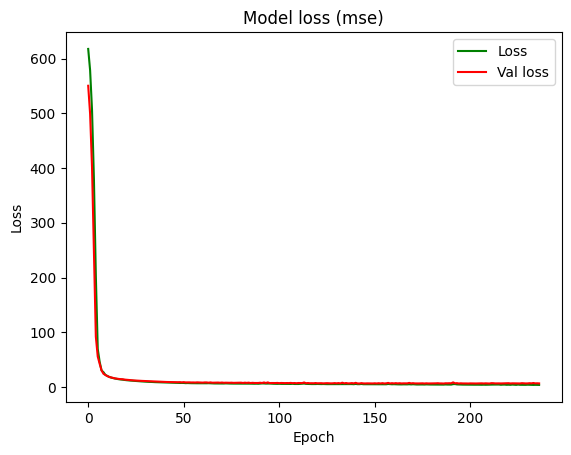

In [8]:
plt.title("Model loss (mse)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='red')
plt.legend(['Loss', 'Val loss'])
plt.show()


Evaluate losses

In [9]:
print("Train loss:", model.evaluate(train_X, train_Y.to_numpy(), verbose=0))
print("Val loss:", model.evaluate(val_X, val_Y.to_numpy(), verbose=0))
print("Test loss:", model.evaluate(test_X, test_Y.to_numpy(), verbose=0))


Train loss: 4.422471046447754
Val loss: 6.430828094482422
Test loss: 7.800738334655762
